<a href="https://colab.research.google.com/github/MadhuMathi-7/Data-Science-and-Data-Visualization/blob/main/Data_Science_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

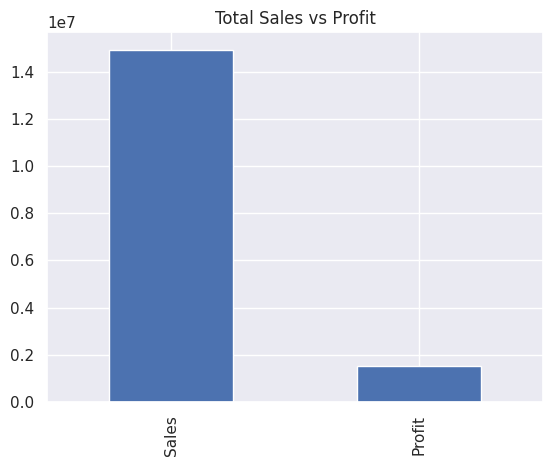

In [1]:
#Import Libraries & Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")
sns.set_theme()
# Load Excel file
file_path = "/content/Sample - Superstore Sales (Excel).xls"
df = pd.read_excel(file_path)
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
# Create new columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

df[['Sales','Profit']].sum().plot(kind='bar', title='Total Sales vs Profit')
plt.show()

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Year', 'Month', 'Month_Name', 'Delivery_Days'],
      dtype='object')
Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Year', 'Month', 'Month_Name', 'Delivery_Days'],
      dtype='object')


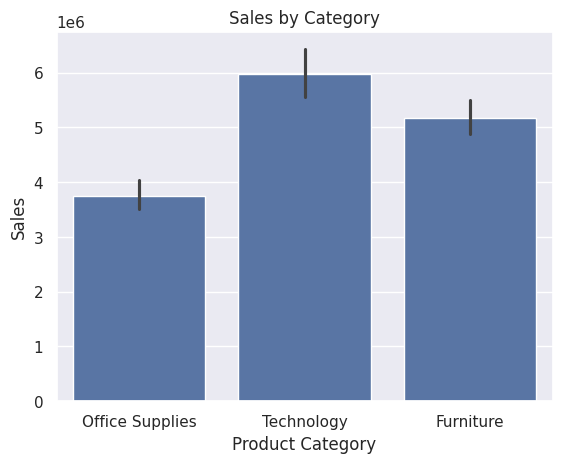

In [3]:
print(df.columns)
#Clean Column Names (BEST PRACTICE)
df.columns = df.columns.str.strip()
print(df.columns)
sns._barplot(data=df, x='Product Category', y='Sales', estimator=sum)
plt.title("Sales by Category")
plt.show()

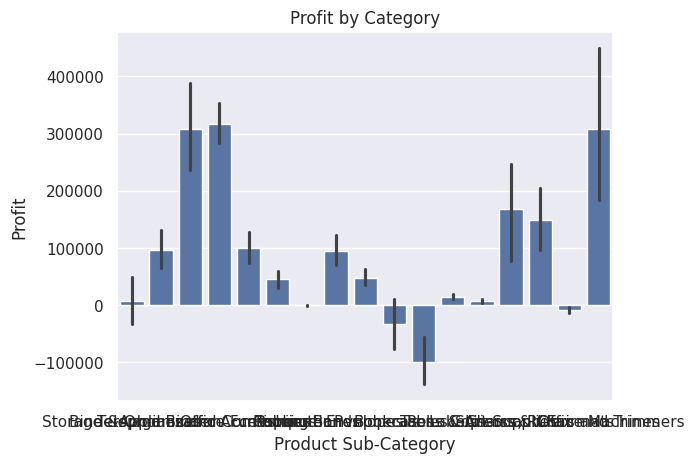

In [4]:
sns.barplot(data=df, x='Product Sub-Category', y='Profit', estimator=sum)
plt.title("Profit by Category")
plt.show()

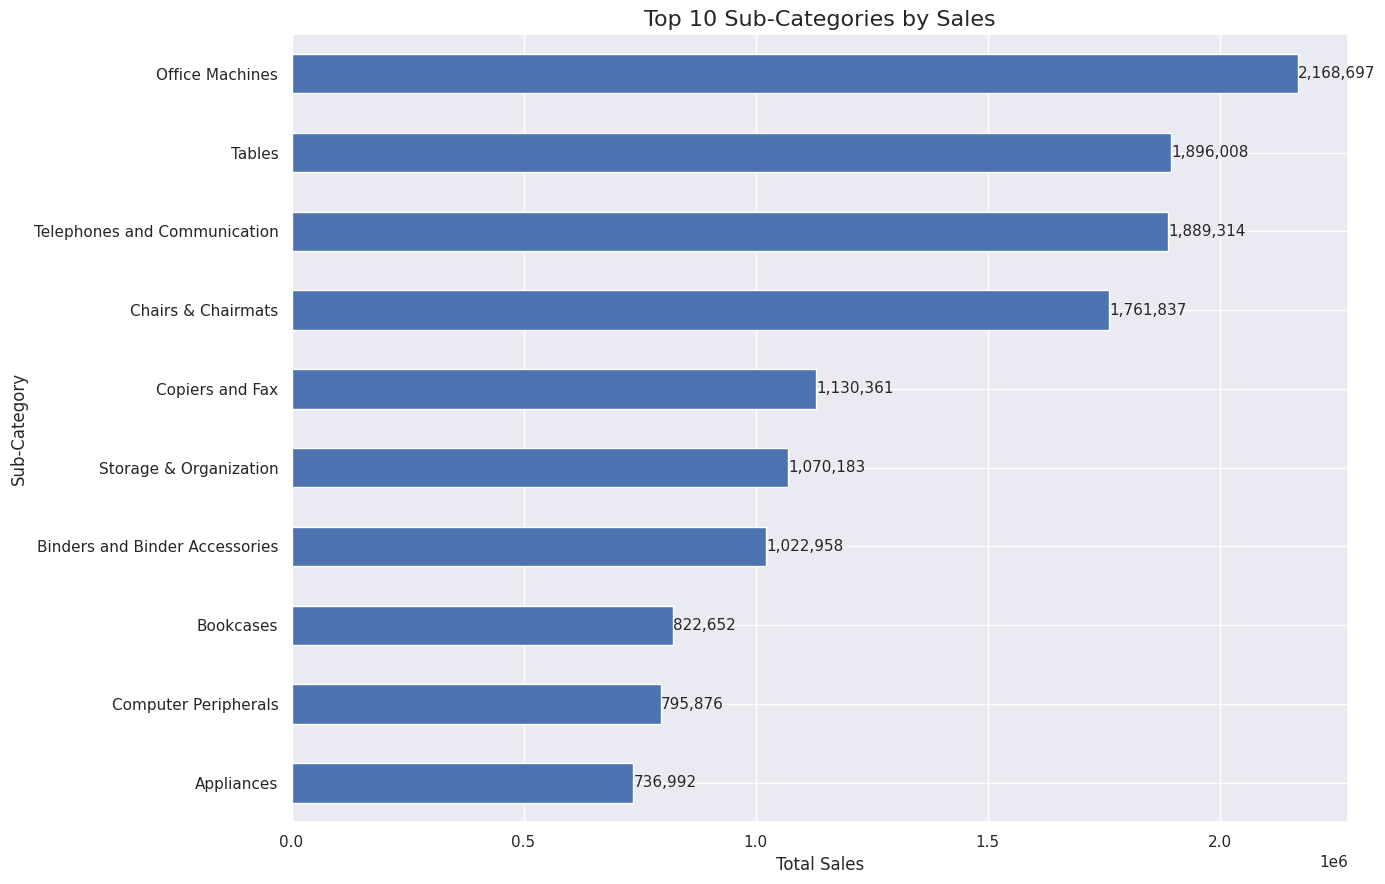

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 9))
top_sub = (
df.groupby('Product Sub-Category')['Sales']
.sum()
.sort_values(ascending=False)
.head(10)
)
ax = top_sub.plot(kind='barh')
# Add numbers on bars
for i, value in enumerate(top_sub.values):
    ax.text(
        value, # x-position
        i, # y-position
        f'{value:,.0f}', # formatted number
        va='center',
        ha='left',
        fontsize=11
    )
ax.invert_yaxis()
plt.title("Top 10 Sub-Categories by Sales", fontsize=16)
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

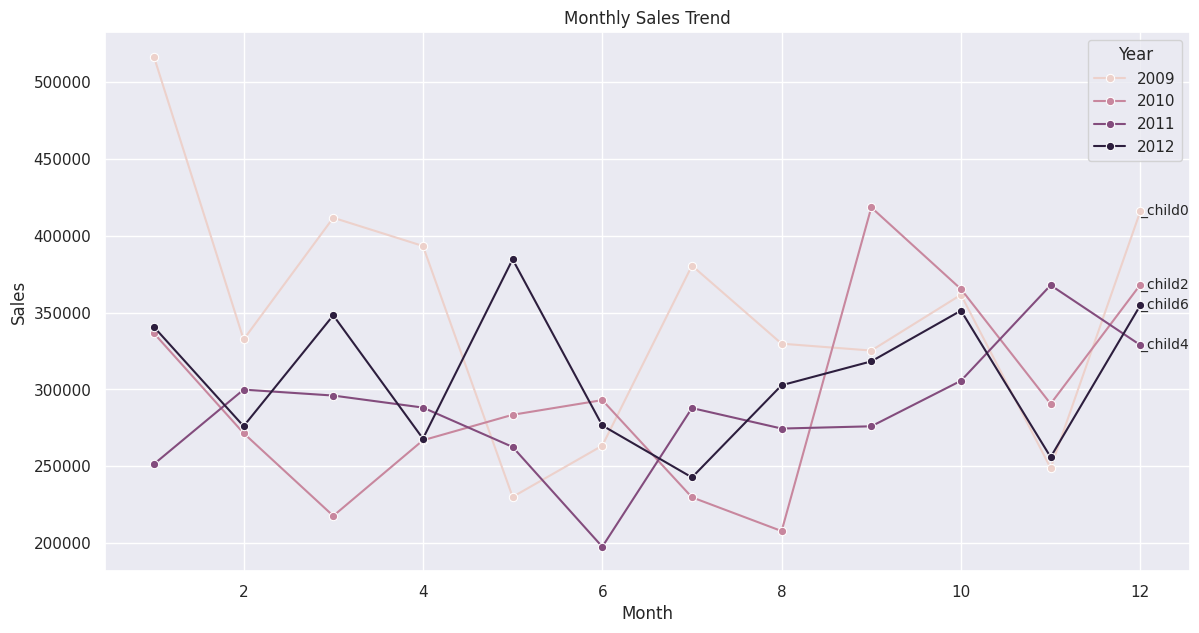

In [10]:
monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Monthly Sales Trend")

def add_line_labels(ax):
    for line in ax.lines:
        if len(line.get_ydata()) > 0:  # Check if the line has data points
            y_value = line.get_ydata()[-1] # Get last y value
            x_value = line.get_xdata()[-1] # Get last x value
            label = line.get_label() # Get the label (e.g., '2009', '2010')
            ax.text(x_value, y_value, label, ha='left', va='center', fontsize=10)

add_line_labels(ax)
plt.show()

/tmp/ipython-input-3280103119.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.92])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


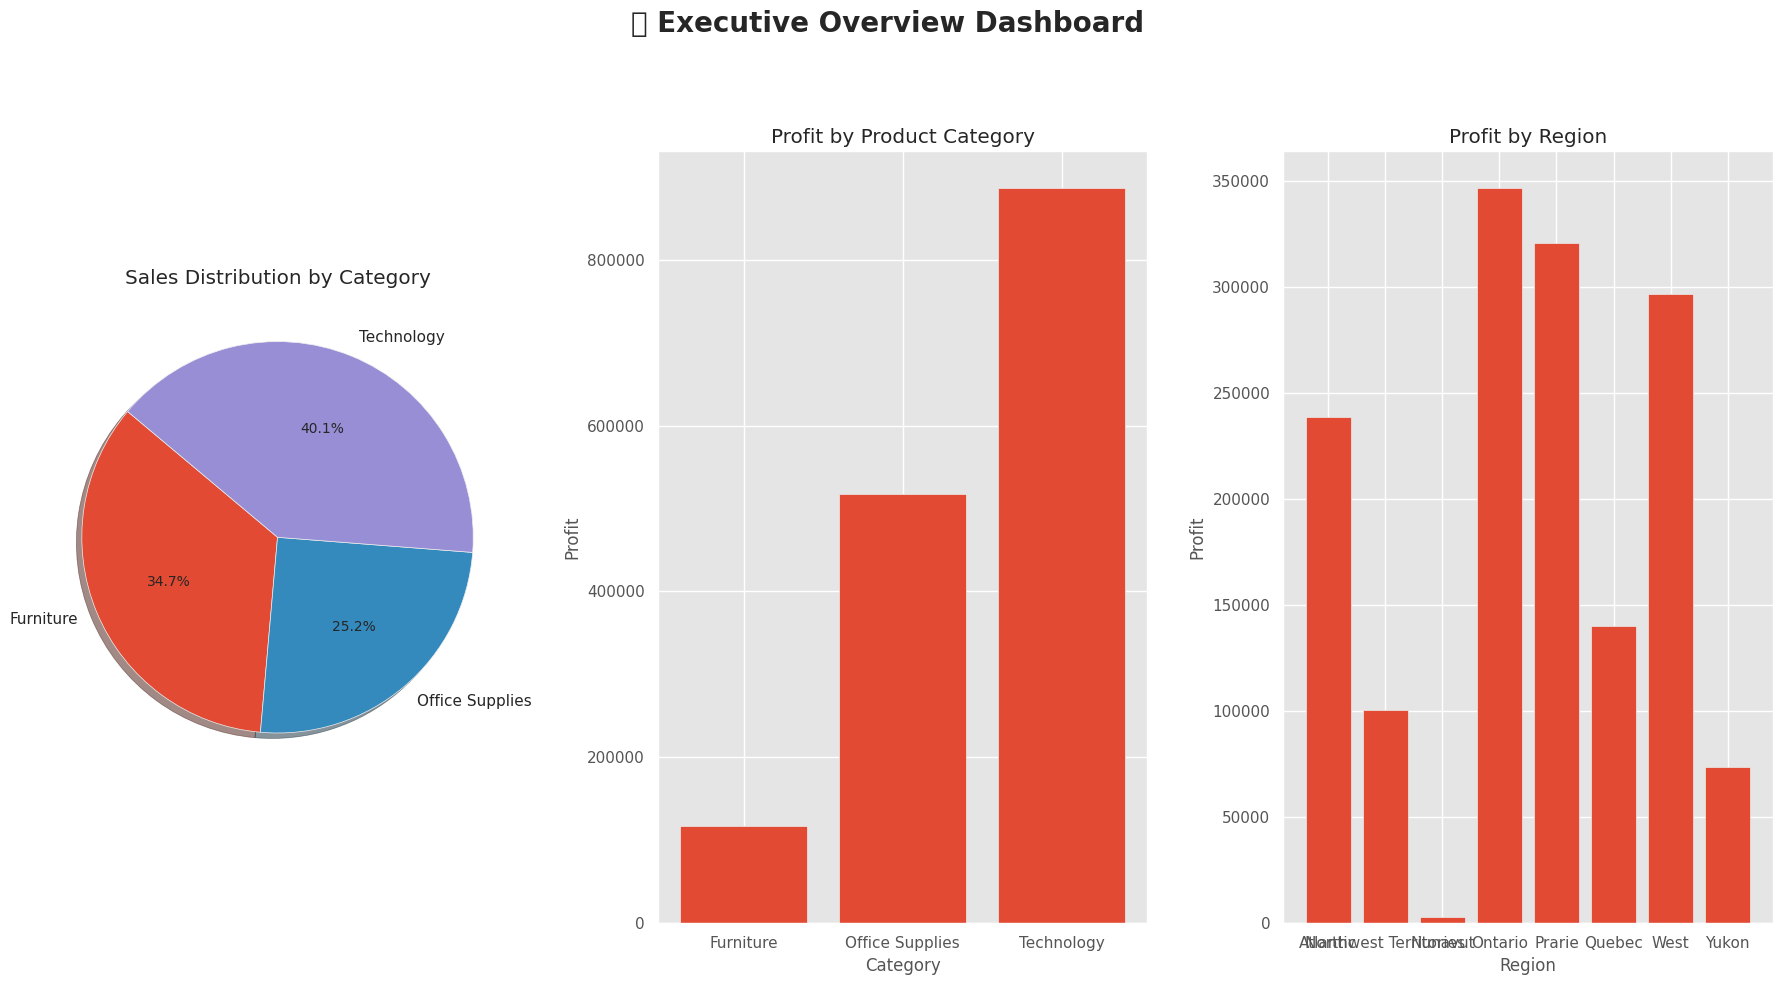

/tmp/ipython-input-3280103119.py:78: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.93])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


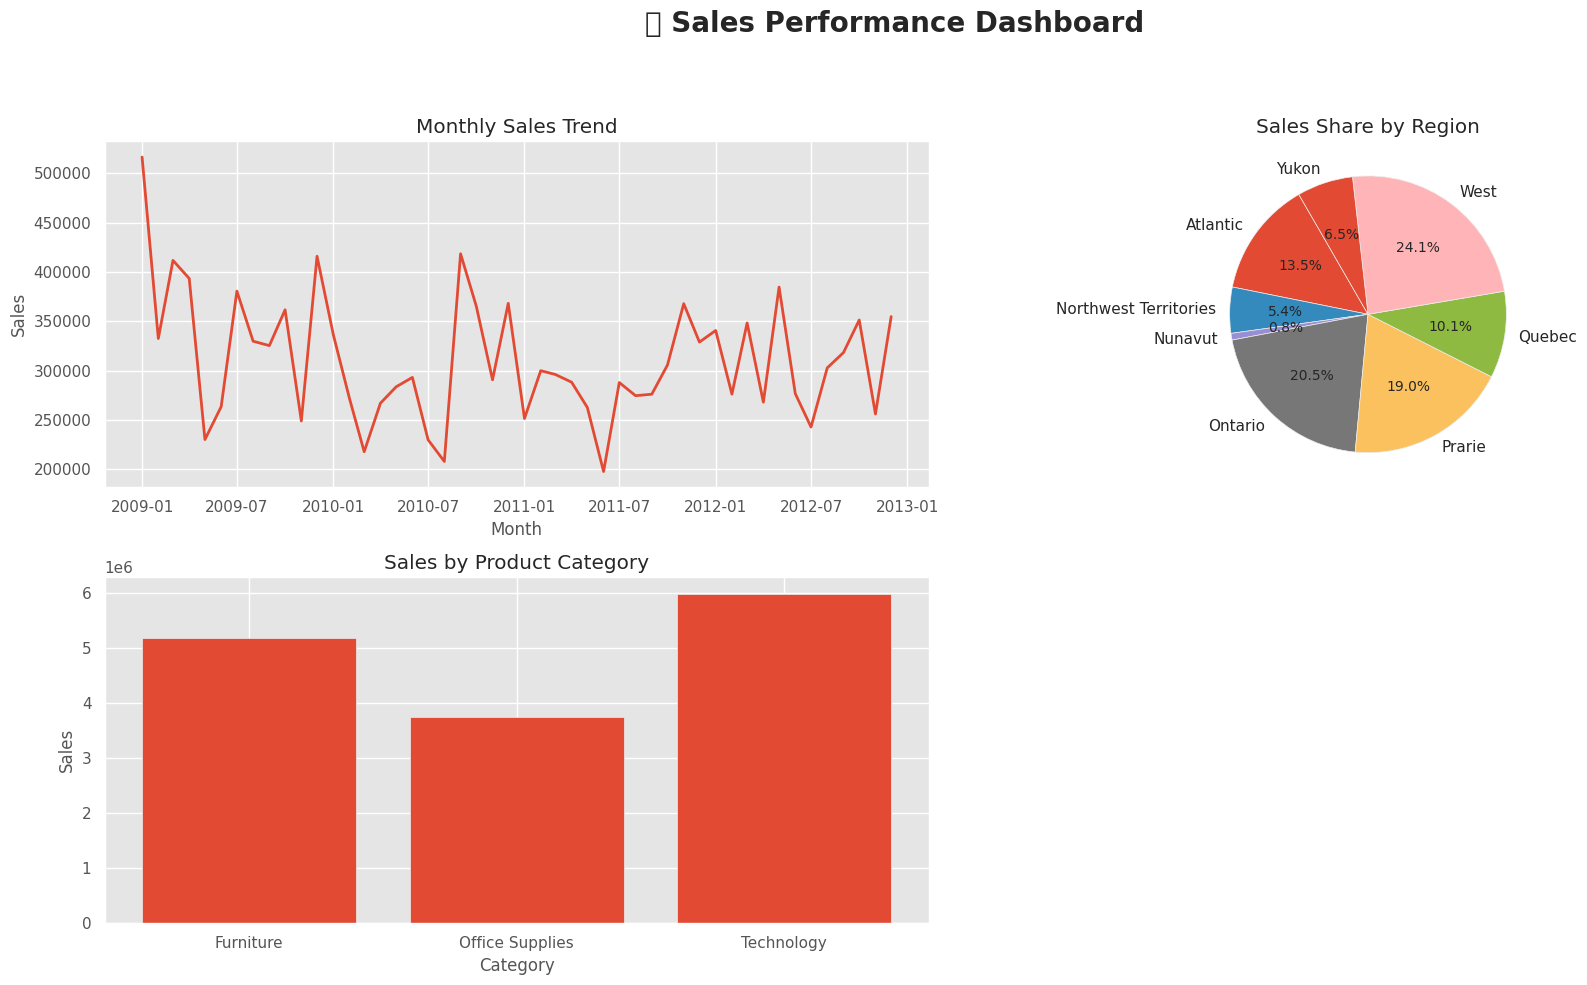

/tmp/ipython-input-3280103119.py:104: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.93])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


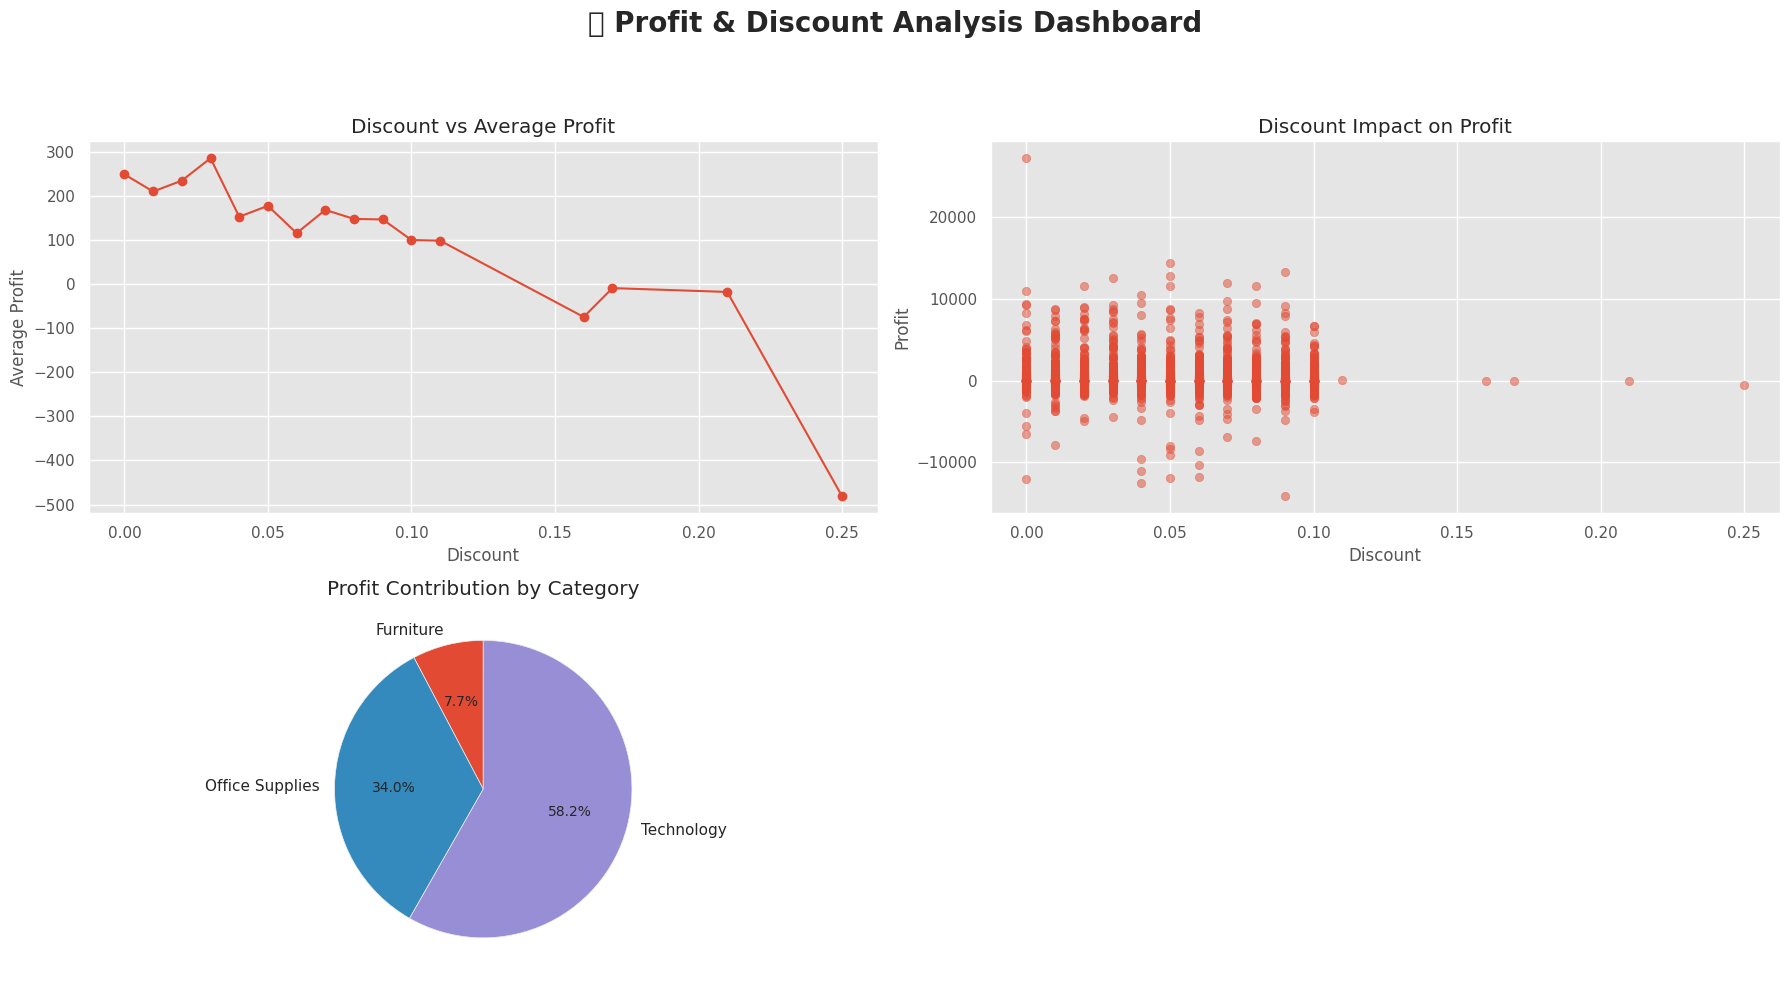

In [12]:
# ===============================
# SUPERSTORE ANALYTICS – 3 DASHBOARDS
# ===============================

import pandas as pd
import matplotlib.pyplot as plt

# Global style for attractive background
plt.style.use('ggplot')

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_excel('/content/Sample - Superstore Sales (Excel).xls')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# -------------------------------
# Data Aggregations
# -------------------------------
profit_by_category = df.groupby('Product Category')['Profit'].sum()
sales_by_category = df.groupby('Product Category')['Sales'].sum()
profit_by_region = df.groupby('Region')['Profit'].sum()
sales_by_region = df.groupby('Region')['Sales'].sum()
discount_profit = df.groupby('Discount')['Profit'].mean()

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# =====================================================
# DASHBOARD 1 – EXECUTIVE OVERVIEW
# =====================================================
fig1 = plt.figure(figsize=(18,10))
fig1.suptitle("📊 Executive Overview Dashboard", fontsize=20, fontweight='bold')

plt.subplot(1,3,1)
plt.pie(sales_by_category, labels=sales_by_category.index,
        autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Sales Distribution by Category")

plt.subplot(1,3,2)
plt.bar(profit_by_category.index, profit_by_category.values)
plt.title("Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Profit")

plt.subplot(1,3,3)
plt.bar(profit_by_region.index, profit_by_region.values)
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")

plt.tight_layout(rect=[0,0,1,0.92])
plt.show()

# =====================================================
# DASHBOARD 2 – SALES PERFORMANCE
# =====================================================
fig2 = plt.figure(figsize=(18,10))
fig2.suptitle("📈 Sales Performance Dashboard", fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.plot(monthly_sales.index, monthly_sales.values, linewidth=2)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")

plt.subplot(2,2,2)
plt.pie(sales_by_region, labels=sales_by_region.index,
        autopct='%1.1f%%', startangle=120)
plt.title("Sales Share by Region")

plt.subplot(2,2,3)
plt.bar(sales_by_category.index, sales_by_category.values)
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Sales")

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

# =====================================================
# DASHBOARD 3 – PROFIT & DISCOUNT ANALYSIS
# =====================================================
fig3 = plt.figure(figsize=(18,10))
fig3.suptitle("💰 Profit & Discount Analysis Dashboard", fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.plot(discount_profit.index, discount_profit.values, marker='o')
plt.title("Discount vs Average Profit")
plt.xlabel("Discount")
plt.ylabel("Average Profit")

plt.subplot(2,2,2)
plt.scatter(df['Discount'], df['Profit'], alpha=0.5)
plt.title("Discount Impact on Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")

plt.subplot(2,2,3)
plt.pie(profit_by_category, labels=profit_by_category.index,
        autopct='%1.1f%%', startangle=90)
plt.title("Profit Contribution by Category")

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

/tmp/ipython-input-415398578.py:44: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.92])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


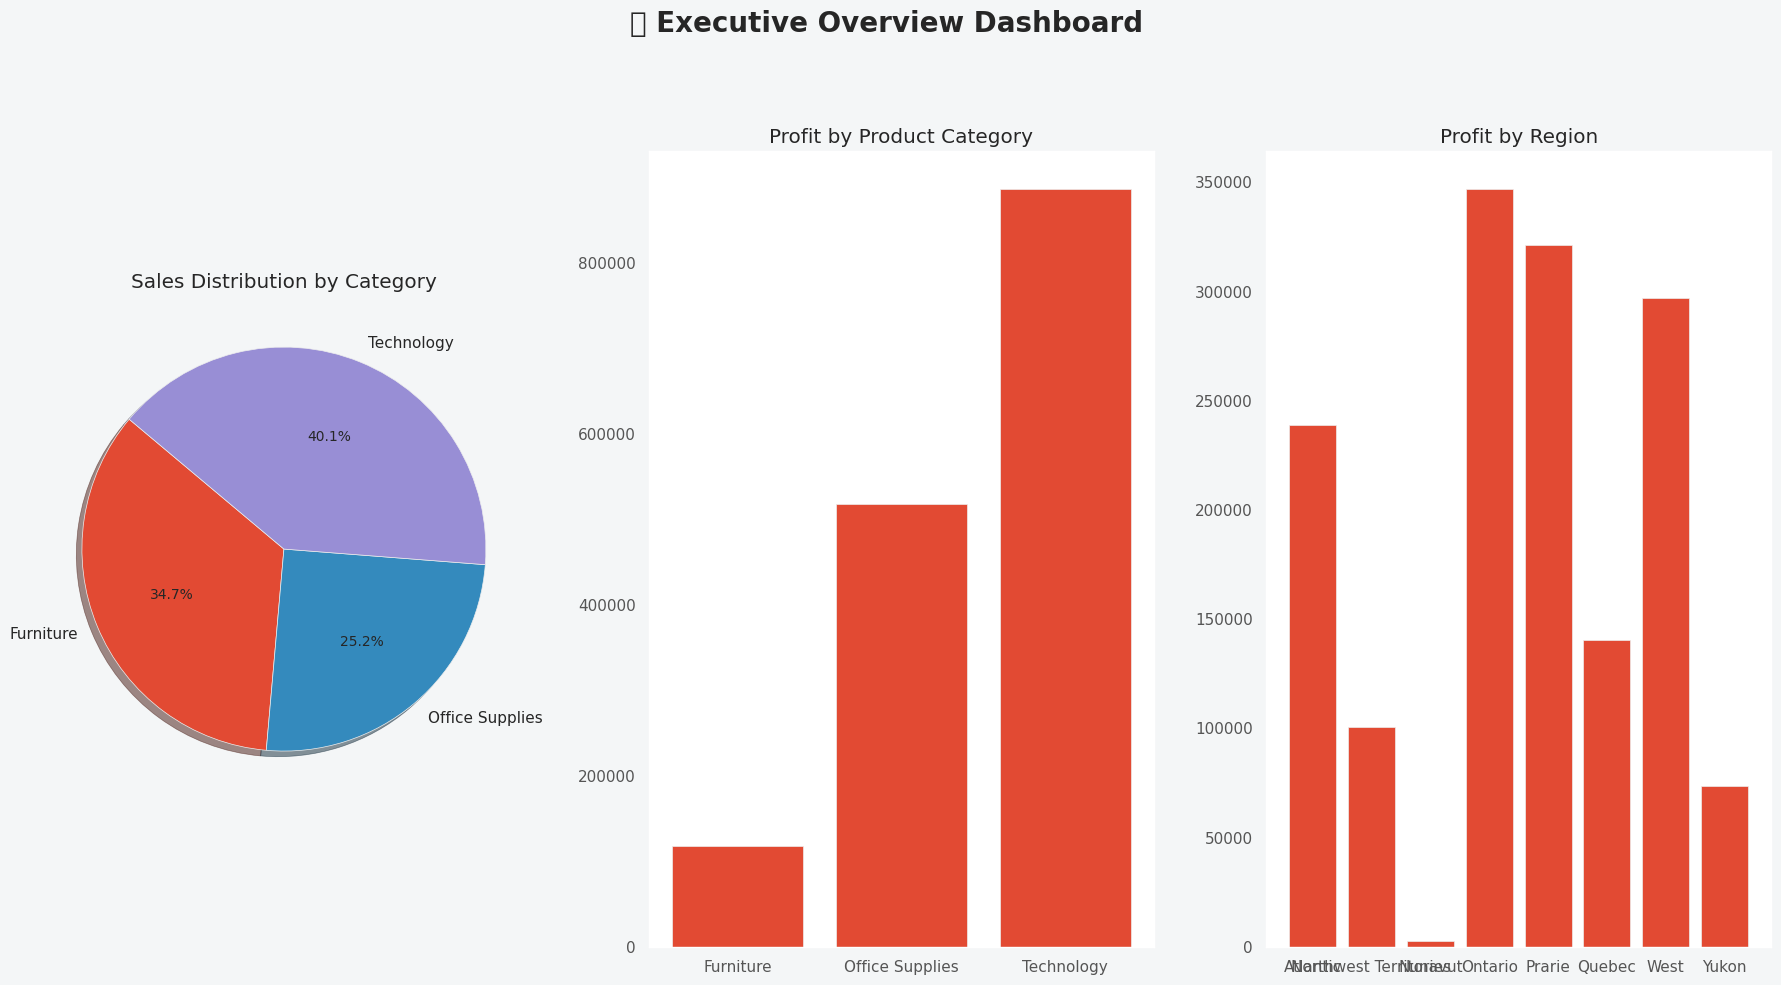

/tmp/ipython-input-415398578.py:69: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.93])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


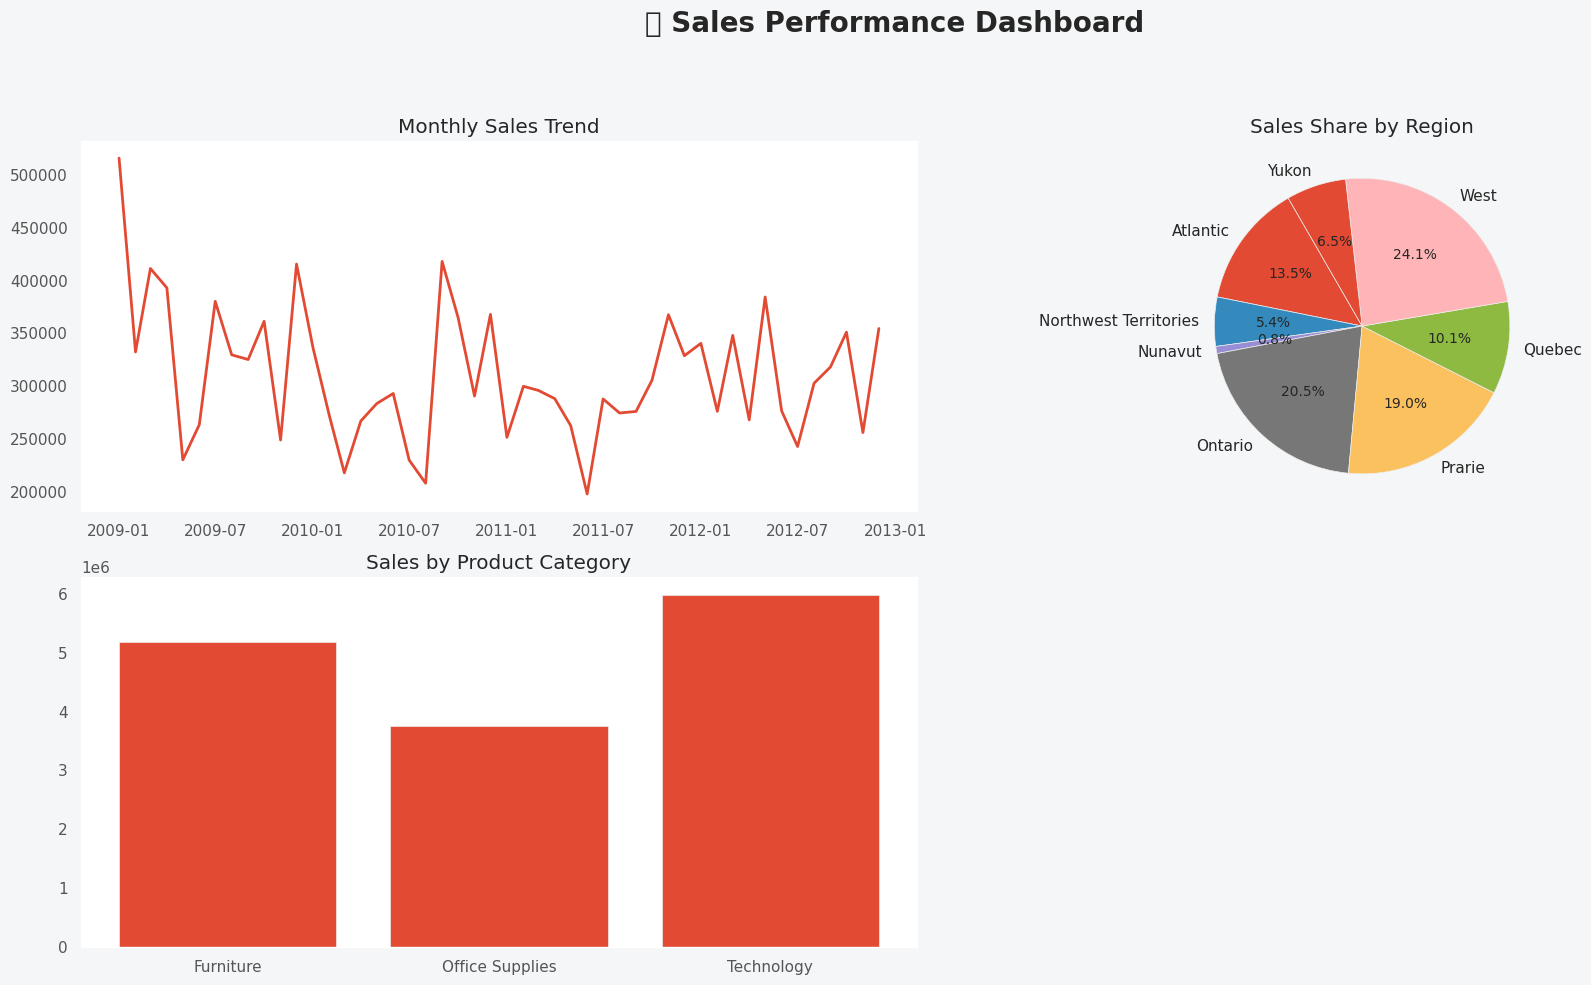

/tmp/ipython-input-415398578.py:94: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.93])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


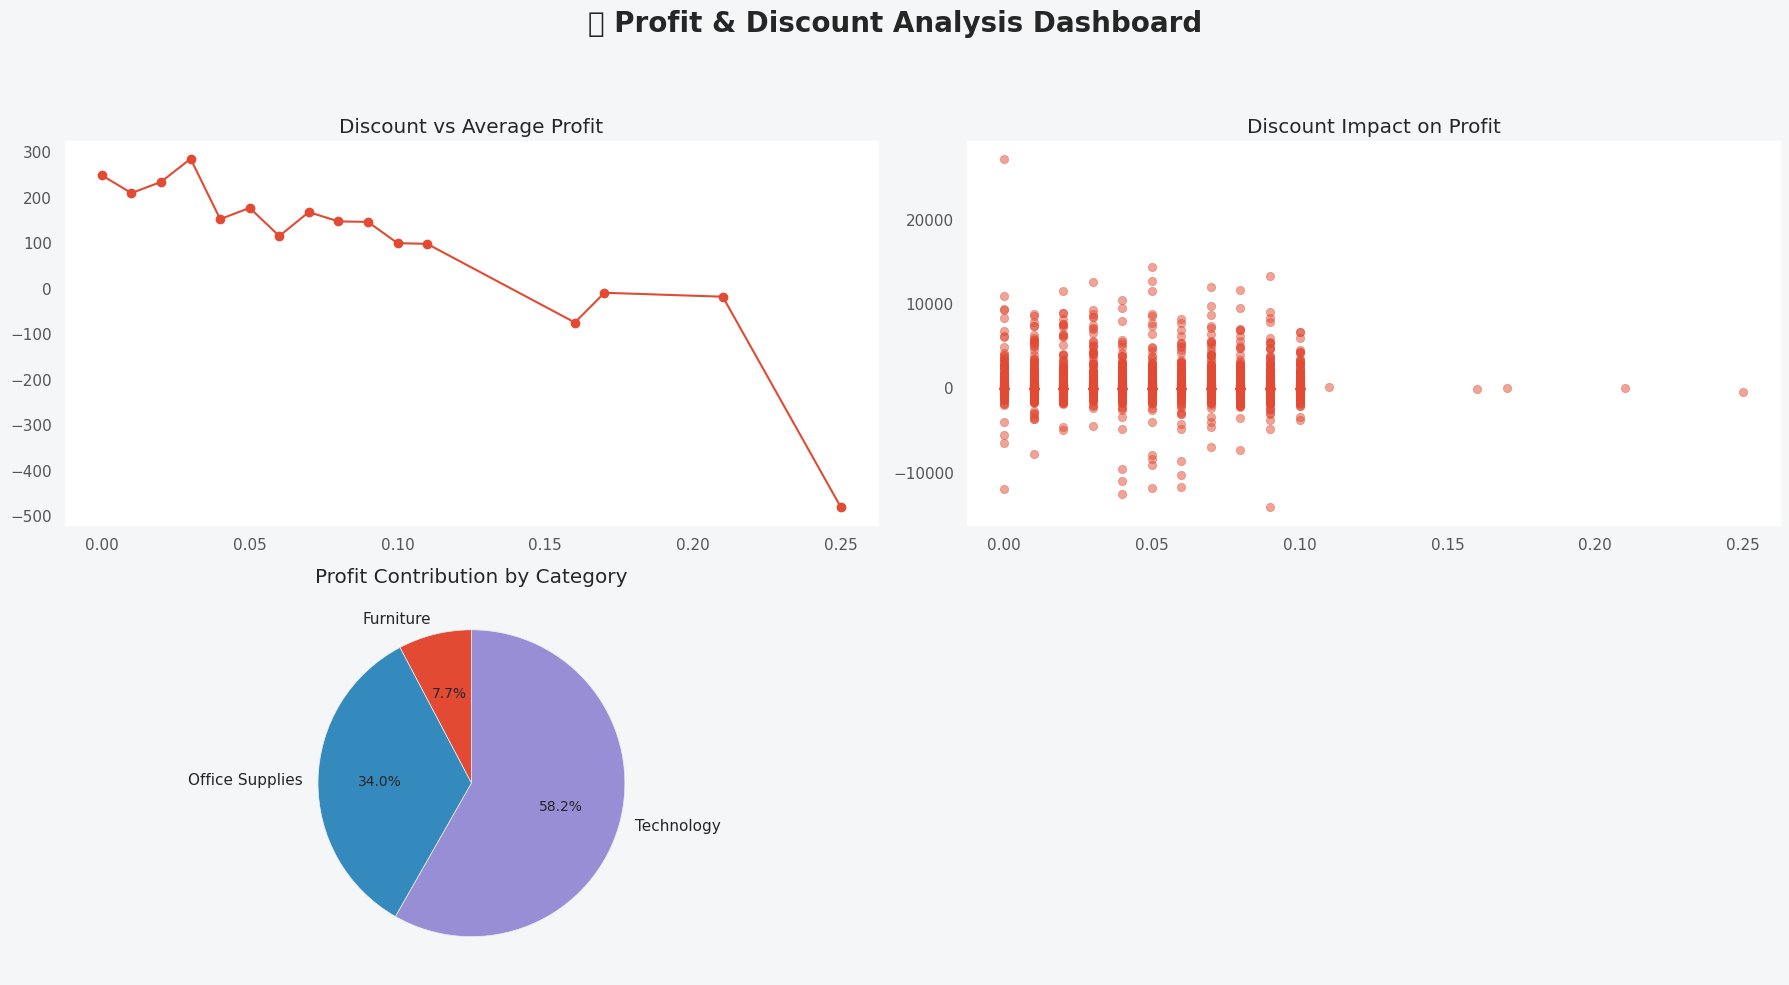

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_excel("/content/Sample - Superstore Sales (Excel).xls")
df['Order Date'] = pd.to_datetime(df['Order Date'])

# -------------------------------
# Data Aggregation
# -------------------------------
profit_by_category = df.groupby('Product Category')['Profit'].sum()
sales_by_category = df.groupby('Product Category')['Sales'].sum()
profit_by_region = df.groupby('Region')['Profit'].sum()
sales_by_region = df.groupby('Region')['Sales'].sum()
discount_profit = df.groupby('Discount')['Profit'].mean()

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# =====================================================
# DASHBOARD 1 – EXECUTIVE OVERVIEW
# =====================================================
fig1 = plt.figure(figsize=(18,10), facecolor='#F4F6F7')
fig1.suptitle("📊 Executive Overview Dashboard", fontsize=20, fontweight='bold')

for i in range(1,4):
    plt.subplot(1,3,i).set_facecolor('#FFFFFF')

plt.subplot(1,3,1)
plt.pie(sales_by_category, labels=sales_by_category.index,
        autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Sales Distribution by Category")

plt.subplot(1,3,2)
plt.bar(profit_by_category.index, profit_by_category.values)
plt.title("Profit by Product Category")

plt.subplot(1,3,3)
plt.bar(profit_by_region.index, profit_by_region.values)
plt.title("Profit by Region")

plt.tight_layout(rect=[0,0,1,0.92])
plt.show()

# =====================================================
# DASHBOARD 2 – SALES PERFORMANCE
# =====================================================
fig2 = plt.figure(figsize=(18,10), facecolor='#F4F6F7')
fig2.suptitle("📈 Sales Performance Dashboard", fontsize=20, fontweight='bold')

for i in range(1,4):
    plt.subplot(2,2,i).set_facecolor('#FFFFFF')

plt.subplot(2,2,1)
plt.plot(monthly_sales.index, monthly_sales.values, linewidth=2)
plt.title("Monthly Sales Trend")

plt.subplot(2,2,2)
plt.pie(sales_by_region, labels=sales_by_region.index,
        autopct='%1.1f%%', startangle=120)
plt.title("Sales Share by Region")

plt.subplot(2,2,3)
plt.bar(sales_by_category.index, sales_by_category.values)
plt.title("Sales by Product Category")

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

# =====================================================
# DASHBOARD 3 – PROFIT & DISCOUNT ANALYSIS
# =====================================================
fig3 = plt.figure(figsize=(18,10), facecolor='#F4F6F7')
fig3.suptitle("💰 Profit & Discount Analysis Dashboard", fontsize=20, fontweight='bold')

for i in range(1,4):
    plt.subplot(2,2,i).set_facecolor('#FFFFFF')

plt.subplot(2,2,1)
plt.plot(discount_profit.index, discount_profit.values, marker='o')
plt.title("Discount vs Average Profit")

plt.subplot(2,2,2)
plt.scatter(df['Discount'], df['Profit'], alpha=0.5)
plt.title("Discount Impact on Profit")

plt.subplot(2,2,3)
plt.pie(profit_by_category, labels=profit_by_category.index,
        autopct='%1.1f%%', startangle=90)
plt.title("Profit Contribution by Category")

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_excel("/content/Sample - Superstore Sales (Excel).xls")
df['Order Date'] = pd.to_datetime(df['Order Date'])

# -------------------------------
# Data Aggregation
# -------------------------------
profit_by_category = df.groupby('Product Category')['Profit'].sum()
sales_by_category = df.groupby('Product Category')['Sales'].sum()
profit_by_region = df.groupby('Region')['Profit'].sum()
sales_by_region = df.groupby('Region')['Sales'].sum()
discount_profit = df.groupby('Discount')['Profit'].mean()

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Common colors
FIG_BG = '#0B1C2D'     # Dark blue
AX_BG = '#12263A'      # Card blue
TEXT_COLOR = 'white'

# =====================================================
# DASHBOARD 1 – EXECUTIVE OVERVIEW
# =====================================================
fig1 = plt.figure(figsize=(18,10), facecolor=FIG_BG)
fig1.suptitle("📊 Executive Overview Dashboard",
              fontsize=20, fontweight='bold', color=TEXT_COLOR)

for i in range(1,4):
    ax = plt.subplot(1,3,i)
    ax.set_facecolor(AX_BG)
    ax.tick_params(colors=TEXT_COLOR)

plt.subplot(1,3,1)
plt.pie(sales_by_category, labels=sales_by_category.index,
        autopct='%1.1f%%', startangle=140,
        textprops={'color': TEXT_COLOR})
plt.title("Sales Distribution by Category", color=TEXT_COLOR)

plt.subplot(1,3,2)
plt.bar(profit_by_category.index, profit_by_category.values)
plt.title("Profit by Product Category", color=TEXT_COLOR)

plt.subplot(1,3,3)
plt.bar(profit_by_region.index, profit_by_region.values)
plt.title("Profit by Region", color=TEXT_COLOR)

plt.tight_layout(rect=[0,0,1,0.92])
plt.show()

# =====================================================
# DASHBOARD 2 – SALES PERFORMANCE
# =====================================================
fig2 = plt.figure(figsize=(18,10), facecolor=FIG_BG)
fig2.suptitle("📈 Sales Performance Dashboard",
              fontsize=20, fontweight='bold', color=TEXT_COLOR)

for i in range(1,4):
    ax = plt.subplot(2,2,i)
    ax.set_facecolor(AX_BG)
    ax.tick_params(colors=TEXT_COLOR)

plt.subplot(2,2,1)
plt.plot(monthly_sales.index, monthly_sales.values, linewidth=2)
plt.title("Monthly Sales Trend", color=TEXT_COLOR)

plt.subplot(2,2,2)
plt.pie(sales_by_region, labels=sales_by_region.index,
        autopct='%1.1f%%', startangle=120,
        textprops={'color': TEXT_COLOR})
plt.title("Sales Share by Region", color=TEXT_COLOR)

plt.subplot(2,2,3)
plt.bar(sales_by_category.index, sales_by_category.values)
plt.title("Sales by Product Category", color=TEXT_COLOR)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

# =====================================================
# DASHBOARD 3 – PROFIT & DISCOUNT ANALYSIS
# =====================================================
fig3 = plt.figure(figsize=(18,10), facecolor=FIG_BG)
fig3.suptitle("💰 Profit & Discount Analysis Dashboard",
              fontsize=20, fontweight='bold', color=TEXT_COLOR)

for i in range(1,4):
    ax = plt.subplot(2,2,i)
    ax.set_facecolor(AX_BG)
    ax.tick_params(colors=TEXT_COLOR)

plt.subplot(2,2,1)
plt.plot(discount_profit.index, discount_profit.values, marker='o')
plt.title("Discount vs Average Profit", color=TEXT_COLOR)

plt.subplot(2,2,2)
plt.scatter(df['Discount'], df['Profit'], alpha=0.5)
plt.title("Discount Impact on Profit", color=TEXT_COLOR)

plt.subplot(2,2,3)
plt.pie(profit_by_category, labels=profit_by_category.index,
        autopct='%1.1f%%', startangle=90,
        textprops={'color': TEXT_COLOR})
plt.title("Profit Contribution by Category", color=TEXT_COLOR)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()